<a href="https://colab.research.google.com/github/Opeyemiiii/opeyemi_python_and_Machine-learning_project_portfolio/blob/main/Body_Calories_Burn_prediction_XGBoos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this project is to predict calories burnt during an excercise.. There are two dataset to be pre loaded the exercise data which are the determinant factor like body tempreture, duration, Hearth rate during the excersise.. all these are the determinant factor for the latter preloaded dataset caloreies data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

In [ ]:
calories = pd.read_csv('/content/calories.csv')

The loaded dataset comprise the calorise burnt data from an individual... The User ID unquely Identifies an individual

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


We have to make the two preloaded dataset a single dataset for our machine learning procedures

In [ ]:
data = pd.concat([exercise, calories['Calories']], axis = 1)

In [ ]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Checking the datapoint in the dataset

In [ ]:
data.shape

(15000, 9)

Checking for null value

In [ ]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Numeric Value :
Age
Height
Weight
Duration
Heart_Rate
Body_Temp
Caloris

Discreet Value: Gender

Data Analytics

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


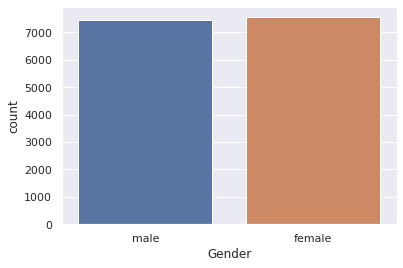

In [ ]:
sns.countplot(data['Gender'])
plt.show()

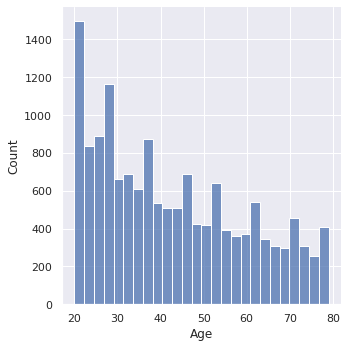

In [ ]:
sns.displot(data['Age'])

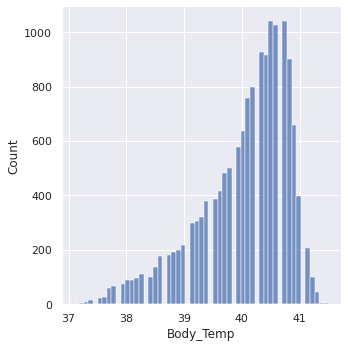

In [ ]:
sns.displot(data['Body_Temp'])

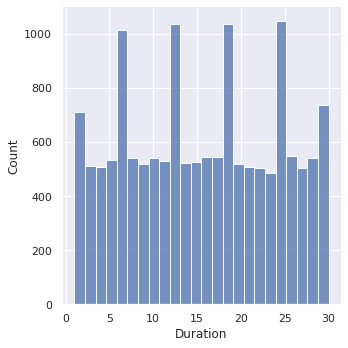

In [ ]:
sns.displot(data['Duration'])

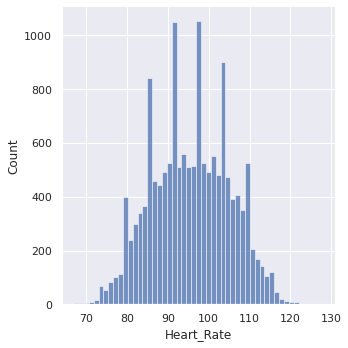

In [ ]:
sns.displot(data['Heart_Rate'])

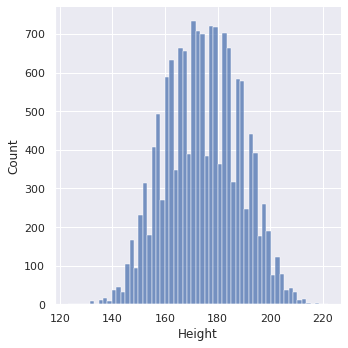

In [ ]:
sns.displot(data['Height'])

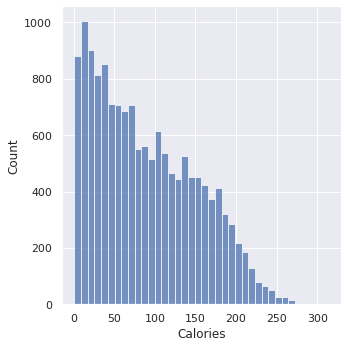

In [ ]:
sns.displot(data['Calories'])

Let check the correlation chart

In [ ]:
correlation = data.corr()

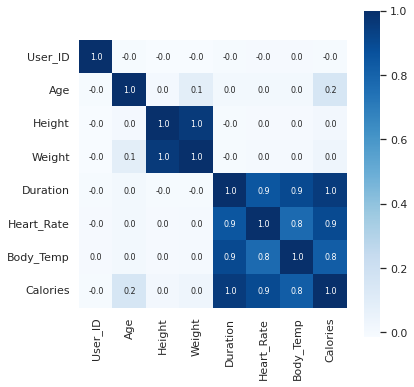

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar = True, square = True, cmap = 'Blues', fmt = '.1f', annot = True, annot_kws= {'size' : 8})

In the above visuals we understand that variable such as Duration, Heart rate and body tempreture highly correlates with calories. Definately if duration, heart rate and body tempreture increases there are a tendecies calories is burn out

In [ ]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Let pre process our data for machine learning model... We need to get the gender variable fixed as it is a discreet variable

In [ ]:
data.replace({"Gender" : { 'male' : 0, 'female' : 1}}, inplace = True)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
x = data.drop(columns = ['User_ID', 'Calories'], axis = 1)
y = data['Calories']

Splitting the data into train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2 , random_state= 2)

In [ ]:
x_train.shape, x_test.shape

((12000, 7), (3000, 7))

Loading in the model

In [ ]:
regression = XGBRegressor()

In [ ]:
model = regression.fit(x_train, y_train)

[05:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Evaluating the model

In [ ]:
train_data_pred = model.predict(x_train)

In [ ]:
r2_score(y_train, train_data_pred)

0.9966777021480265

In [ ]:
metrics.mean_absolute_error(y_train, train_data_pred)

2.5767704472566644

Testing the model

In [ ]:
test_data_pred = model.predict(x_test)

In [ ]:
r2_score(test_data_pred, y_test)

0.996263215009898

In [ ]:
metrics.mean_absolute_error(test_data_pred, y_test)

2.7159012502233186

In [ ]:
test_data_pred

array([129.06204 , 223.79721 ,  39.181965, ..., 145.59767 ,  22.53474 ,
        92.29064 ], dtype=float32)

In [ ]:
prediction = pd.DataFrame(test_data_pred, columns = ['predicted value'])

In [ ]:
output = pd.DataFrame(y_test)

In [ ]:
concated = pd.concat([x_test, output], axis = 1)
concated.reset_index(drop = True, inplace= True)
concated.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,41,172.0,74.0,24.0,98.0,40.8,127.0
1,0,70,189.0,96.0,24.0,113.0,40.9,224.0
2,1,53,173.0,68.0,7.0,96.0,39.3,38.0
3,0,36,191.0,96.0,2.0,82.0,38.4,6.0
4,1,46,169.0,68.0,20.0,111.0,40.6,137.0


In [ ]:
predicted_data = pd.concat([concated, prediction], axis = 1)
predicted_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,predicted value
0,1,41,172.0,74.0,24.0,98.0,40.8,127.0,129.062042
1,0,70,189.0,96.0,24.0,113.0,40.9,224.0,223.797211
2,1,53,173.0,68.0,7.0,96.0,39.3,38.0,39.181965
3,0,36,191.0,96.0,2.0,82.0,38.4,6.0,5.582192
4,1,46,169.0,68.0,20.0,111.0,40.6,137.0,132.407654


(5389, 9)

In [ ]:
x = [1,2,3,4,5,6,7,8]
y = [200,400,600,800,1200,1400,1600,1800]

import pandas as pd

Dataframe = pd.DataFrame(x,y, ['Years'])
print(Dataframe)

      Years
200       1
400       2
600       3
800       4
1200      5
1400      6
1600      7
1800      8
